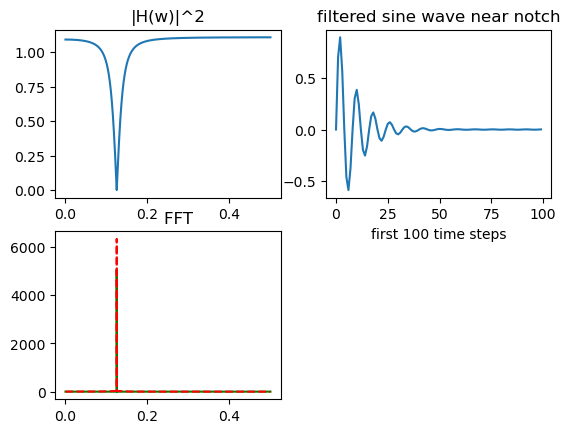

In [4]:
import numpy as np
from numpy.fft import rfft
from numpy import pi
from scipy.signal import lfilter
import matplotlib.pyplot as plt

b=[1,-1.414, 1.0]
a=[1,-1.273,0.81]

N_pts=100000
w=np.linspace(0,np.pi,N_pts//2)

z= np.exp(1j*w)

H = (b[0] + b[1]/z + b[2]/z**2)/(a[0] + a[1]/z + a[2]/z**2)
freq_vals=np.linspace(0,0.5,N_pts//2)

f=0.125 # frequency close to the notch
times = np.arange(N_pts)
signal = np.sin(2*np.pi*f*times) 

filtered = lfilter(b,a,signal) # filtered signal
# note initial oscillations, then becomes zero as expected

## calculate |Y(z)|^2 two different ways
fft2_direct = np.absolute(rfft(filtered))**2
Yz_direct = fft2_direct[:-1] # ignore last freq

fft2_sig = np.absolute(rfft(signal))**2
fft2_sig = fft2_sig[:-1] # ignore last freq

Hmag = np.absolute(H)**2
Yz_H = fft2_sig*Hmag


plt.subplot(2,2,1)
plt.plot(freq_vals,np.absolute(H))
plt.title('|H(w)|^2')
plt.subplot(2,2,2)
plt.plot(filtered[:100])
plt.xlabel('first 100 time steps')
plt.title('filtered sine wave near notch')
plt.subplot(2,2,3)
plt.plot(freq_vals[1:],Yz_H[1:],'g-')
plt.plot(freq_vals[1:],Yz_direct[1:],'r--')
plt.title('    FFT')
plt.show()